# Induced Co-Linked, Co-Linking and Co-Transitive Undirected Graphs by a Directed Graph
## By Moses Boudourides

In [1]:
import networkx as nx
import random
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import operator
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
name="Erdos-Renyi random directed graph"
# name="directed Scale-Free graph"
nodes=random.randint(90,110)
p=random.uniform(0.01,0.02)
# nodes=random.randint(90,110)
# G = nx.scale_free_graph(nodes)
# G=nx.erdos_renyi_graph(nodes,p,directed=True)

while True:
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
#     G = nx.scale_free_graph(nodes)
    if nx.number_of_isolates(G)==0: #nx.is_weakly_connected(G)==True: #
        break
# G = nx.read_gpickle("graph1.gpickle")
G=nx.DiGraph(G,name=name)

In [3]:
print ("Graph G is a %s  with %i nodes and %i edges" %(str(G),len(G.nodes()),len(G.edges())))
if G.is_directed()==False:
    if nx.is_connected(G)==True:
        print "G is a connected graph"
    else:
        print "G is a disconnected graph and it has",nx.number_connected_components(G),"connected components"    
else:
    if nx.is_strongly_connected(G)==True:
        print "G is a strongly connected graph"
    else:
        print "G is not strongly connected and it has",nx.number_strongly_connected_components(G),"strongly connected components"
    if nx.is_weakly_connected(G)==True:
        print "G is a weakly connected graph"
    else:
        print "G is not weakly connected and it has",nx.number_weakly_connected_components(G),"weakly connected components" 
print "The density of G is %.3f" %nx.density(G)
print "The reciprocity of G is %.3f" %nx.overall_reciprocity(G)

Graph G is a Erdos-Renyi random directed graph  with 97 nodes and 139 edges
G is not strongly connected and it has 81 strongly connected components
G is not weakly connected and it has 3 weakly connected components
The density of G is 0.015
The reciprocity of G is 0.000


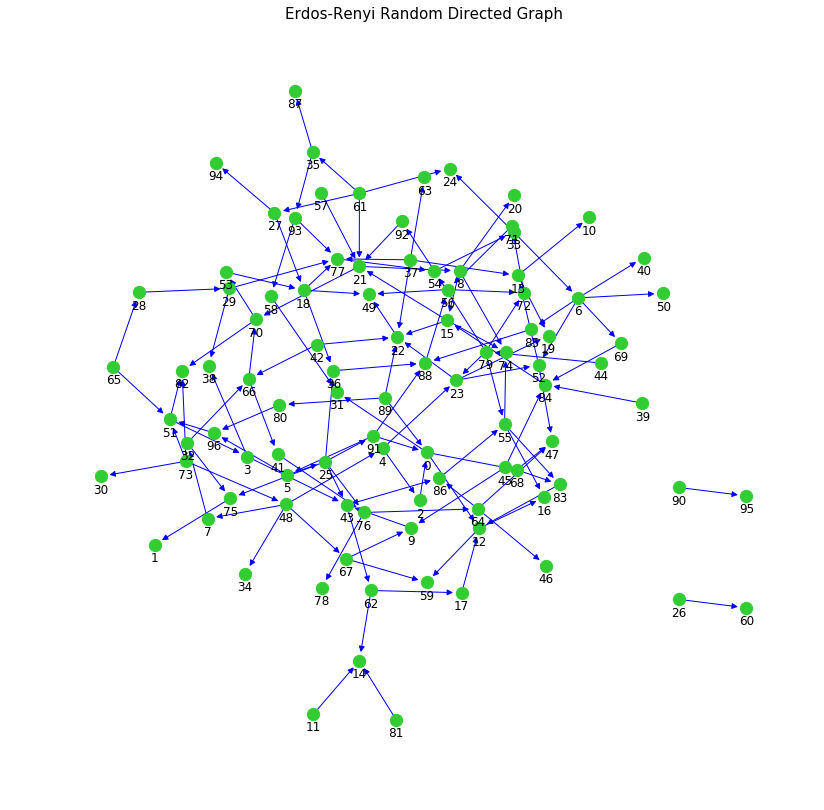

In [4]:
pos=graphviz_layout(G)
plt.figure(figsize=(14,14));
nx.draw_networkx_edges(G, pos,arrowsize=12, edge_color="b", alpha=1)
nodes = nx.draw_networkx_nodes(G, pos, node_size=150, node_color="limegreen", alpha=1)
# nx.draw_networkx_labels(G, pos)
plt.axis('off');
yoffset = {}
y_off = -17 #0.05  # offset on the y axis
# sn=[30,107]
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
#     if k in sn:
#         yoffset[k] = (v[0], v[1]+y_off)
#     else:
#         yoffset[k] = (v[0], v[1]-1000)
nx.draw_networkx_labels(G, yoffset);
plt.title(name.title(),fontsize=15);

In [5]:
# nx.write_gpickle(G, "graph1.gpickle")

### The co-linked graph

<span style="font-size:large;">Given a directed graph $G=(V,E)$, the induced **co-linked graph** $G_{\textrm{cout}} = (V_{\textrm{cout}},E_{\textrm{cout}})$ is a weighted undireced graph such that $V_{\textrm{cout}} \subset V$ and $(u,v) \in E_{\textrm{cout}}$ whenever there exist $w \in V$ such that $(w,u) \in E$ and $(w,v) \in E$. The weight of $G_{\textrm{cout}}$ is the number of such $w$.</span>

In [6]:
G2=G.copy()
medgesout=[]
n_out=[n for n in G2.nodes() if G2.out_degree(n)>1]
for n in n_out:
    nn=list(G2.successors(n))
    combs=it.combinations(nn, 2)
    for j in combs:
        medgesout.append((j[0],j[1]))

name="the corresponding to G induced co-linked undirected graph"
Gcout=nx.MultiGraph()
Gcout.add_edges_from(medgesout)
Gcout=nx.MultiGraph(Gcout,name=name)

Gcout1=Gcout.copy()
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(Gcout1.edges()).items()]
Gcout1 = nx.Graph(weight)
edge_width=[Gcout1[u][v]['weight'] for u,v in Gcout1.edges()]

In [7]:
print "Gcout is %s with %i nodes and %i edges" %(str(Gcout),len(Gcout1.nodes()),len(Gcout1.edges()))
if nx.is_weighted(Gcout1)==True:
    print "Gcout is a weighted undirected graph"
else:
    print "Gcout is an unweighted undirected graph"
if nx.is_connected(Gcout)==True:
    print "Gcout is a connected graph"
else:
    print "Gcout is a disconnected graph and it has",nx.number_connected_components(Gcout),"connected components"    
print "The density of Gcout is %.3f" %nx.density(Gcout)

Gcout is the corresponding to G induced co-linked undirected graph with 75 nodes and 103 edges
Gcout is a weighted undirected graph
Gcout is a disconnected graph and it has 11 connected components
The density of Gcout is 0.037


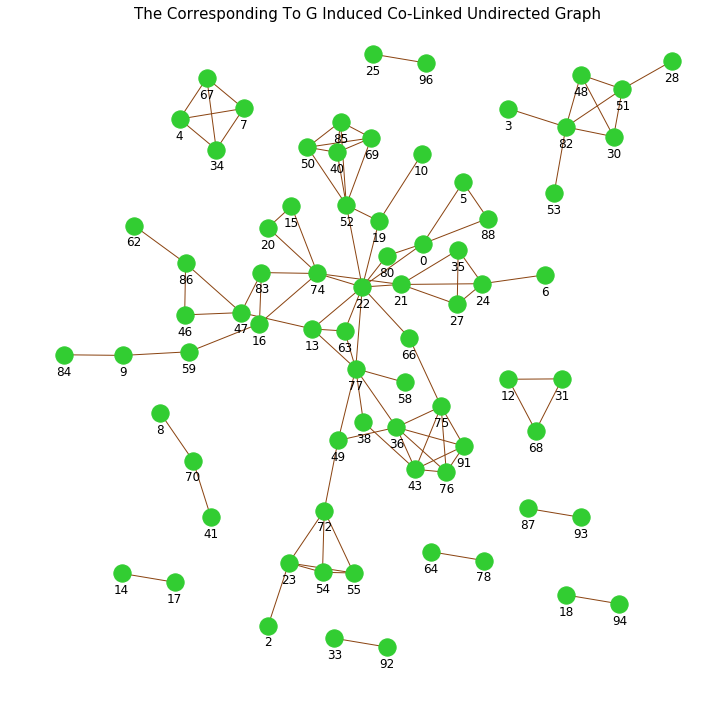

In [8]:
pos=graphviz_layout(Gcout1)
plt.figure(figsize=(12,12));
nx.draw_networkx_edges(Gcout1, pos, width=edge_width, edge_color="saddlebrown", alpha=1)
nodes = nx.draw_networkx_nodes(Gcout1, pos, node_color="limegreen", alpha=1)
# nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
# nx.draw_networkx_labels(Gcin1, pos)
plt.axis('off');
yoffset = {}
y_off = -20  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gcout, yoffset);
plt.title(name.title(),fontsize=15);

### The co-linking graph

<span style="font-size:large;">Given a directed graph $G=(V,E)$, the induced **co-linking graph** $G_{\textrm{cin}} = (V_{\textrm{cin}},E_{\textrm{cin}})$ is a weighted undireced graph such that $V_{\textrm{cin}} \subset V$ and $(u,v) \in E_{\textrm{cin}}$ whenever there exist $w \in V$ such that $(u,w) \in E$ and $(v,w) \in E$. The weight of $G_{\textrm{cin}}$ is the number of such $w$.</span>

In [9]:
G1=G.copy()
medgesin=[]
n_in=[n for n in G1.nodes() if G1.in_degree(n)>1]
for n in n_in:
    nn=list(G1.predecessors(n))
    combs=it.combinations(nn, 2)
    for j in combs:
        medgesin.append((j[0],j[1]))

name="the corresponding to G induced co-linking undirected graph"
Gcin=nx.MultiGraph()
Gcin.add_edges_from(medgesin)
Gcin=nx.MultiGraph(Gcin,name=name)

Gcin1=Gcin.copy()
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(Gcin1.edges()).items()]
Gcin1 = nx.Graph(weight)
edge_width=[Gcin1[u][v]['weight'] for u,v in Gcin1.edges()]

In [10]:
print "Gcin is the %s with %i nodes and %i edges" %(str(Gcin),len(Gcin1.nodes()),len(Gcin1.edges()))
if nx.is_weighted(Gcin1)==True:
    print "Gcin is a weighted undirected graph"
else:
    print "Gcin is an unweighted undirected graph"
if nx.is_connected(Gcin)==True:
    print "Gcin is a connected graph"
else:
    print "Gcin is a disconnected graph and it has",nx.number_connected_components(Gcin),"connected components"    
print "The density of Gcin is %.3f" %nx.density(G)

Gcin is the the corresponding to G induced co-linking undirected graph with 61 nodes and 79 edges
Gcin is a weighted undirected graph
Gcin is a disconnected graph and it has 8 connected components
The density of Gcin is 0.015


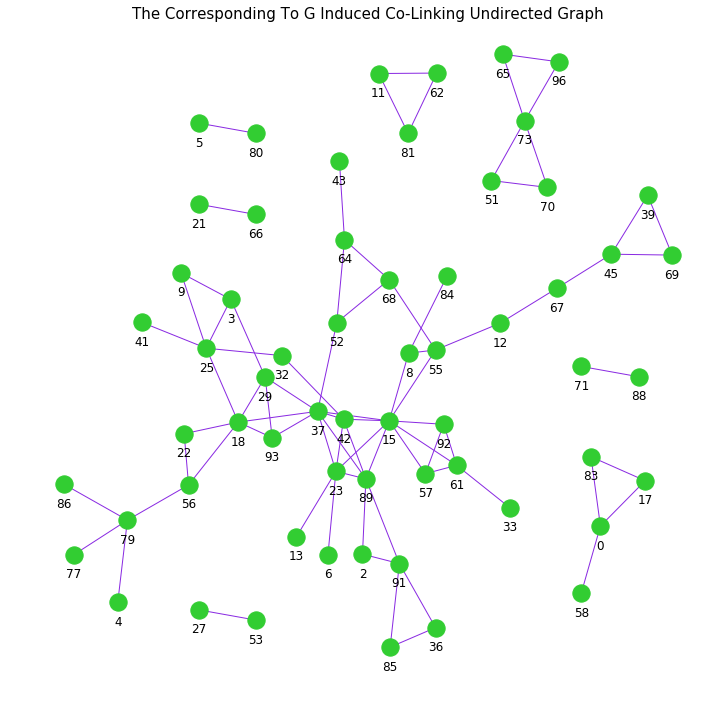

In [11]:
pos=graphviz_layout(Gcin1)
plt.figure(figsize=(12,12));
nx.draw_networkx_edges(Gcin1, pos, width=edge_width, edge_color="blueviolet", alpha=1)
nodes = nx.draw_networkx_nodes(Gcin1, pos, node_color="limegreen", alpha=1)
# nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
# nx.draw_networkx_labels(Gcin1, pos)
plt.axis('off');
yoffset = {}
y_off = -20  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gcin, yoffset);
plt.title(name.title(),fontsize=15);

### The co-transitive graph

<span style="font-size:large;">Given a directed graph $G=(V,E)$, the induced **co-transitive graph** $G_{\textrm{trans}} = (V_{\textrm{trans}},E_{\textrm{trans}})$ is a weighted undireced graph such that $V_{\textrm{trans}} \subset V$ and $(u,v) \in E_{\textrm{trans}}$ whenever there exist $w \in V$ such that either $(u,w) \in E$ and $(w,v) \in E$ or $(v,w) \in E$ and $(w,u) \in E$. The weight of $G_{\textrm{trans}}$ is the number of such $w$.</span>

In [12]:
G3=G.copy()
medgestrans=[]

for e in list(G3.edges()):
    n,m=e[0],e[1]
    outn=list(G2.successors(n))
    if len(outn)>0:
        for k in outn:
            outk=list(G2.successors(k))
            if len(outk)>0:
                for q in outk:
                    outq=list(G2.successors(q))
                    if len(outq)>0:
                        if m in outk:
                            medgestrans.append((n,m))
    n,m=e[1],e[0]
    outn=list(G2.successors(n))
    if len(outn)>0:
        for k in outn:
            outk=list(G2.successors(k))
            if len(outk)>0:
                for q in outk:
                    outq=list(G2.successors(q))
                    if len(outq)>0:
                        if m in outk:
                            medgestrans.append((n,m))

                            name="the corresponding to G induced co-transitive undirected graph"
Gtrans=nx.MultiGraph()
Gtrans.add_edges_from(medgestrans)
Gtrans=nx.MultiGraph(Gtrans,name=name)

Gtrans1=Gtrans.copy()
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(Gtrans1.edges()).items()]
Gtrans1 = nx.Graph(weight)
edge_width=[Gtrans1[u][v]['weight'] for u,v in Gtrans1.edges()]

In [13]:
print "Gtrans is the %s with %i nodes and %i edges" %(str(Gtrans),len(Gtrans1.nodes()),len(Gtrans1.edges()))
if nx.is_weighted(Gtrans1)==True:
    print "Gtrans is a weighted undirected graph"
else:
    print "Gtrans is an unweighted undirected graph"
if nx.is_connected(Gtrans)==True:
    print "Gtrans is a connected graph"
else:
    print "Gtrans is a disconnected graph and it has",nx.number_connected_components(Gtrans),"connected components"    
print "The density of Gtrans is %.3f" %nx.density(Gtrans)

Gtrans is the the corresponding to G induced co-transitive undirected graph with 12 nodes and 11 edges
Gtrans is a weighted undirected graph
Gtrans is a disconnected graph and it has 4 connected components
The density of Gtrans is 0.318


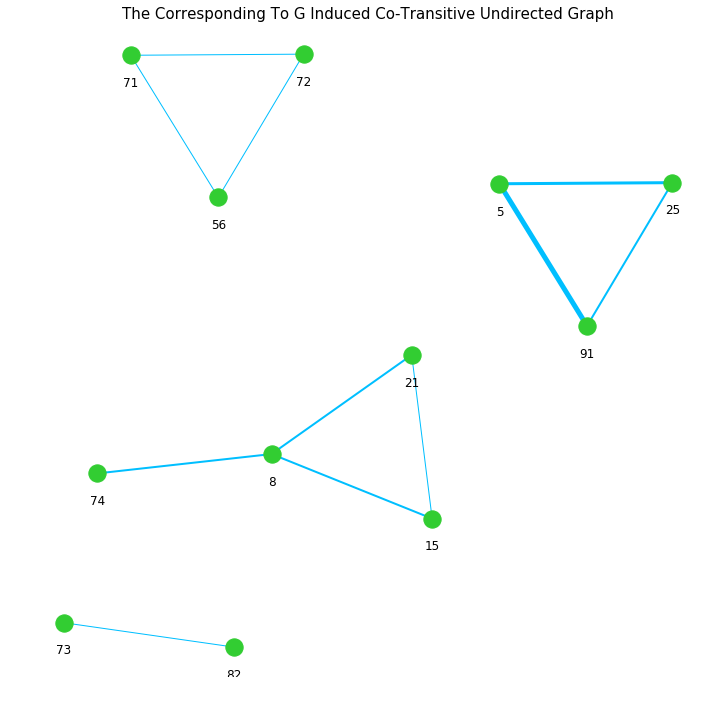

In [14]:
pos=graphviz_layout(Gtrans1)
plt.figure(figsize=(12,12));
nx.draw_networkx_edges(Gtrans1, pos, width=edge_width, edge_color="deepskyblue", alpha=1)
nodes = nx.draw_networkx_nodes(Gtrans1, pos, node_color="limegreen", alpha=1)
# nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
# nx.draw_networkx_labels(Gcin1, pos)
plt.axis('off');
yoffset = {}
y_off = -12  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gtrans, yoffset);
plt.title(name.title(),fontsize=15);